In [127]:
# import necessary libraries

# Essentials libraries
import numpy as np
import pandas as pd

# Plot libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Model libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Misc libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 1
pd.options.display.max_rows = 1

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [128]:
df_data = pd.read_csv("./data/CarPrice_Assignment.csv")

In [129]:
df_data.columns

Index([...
       'car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object', length=26)

In [130]:
df_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0


In [131]:
df_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [132]:
df_data.isnull().sum()

car_ID    0
         ..
Length: 26, dtype: int64

In [133]:
# 자동차 회사 추출
df_data['Company'] = 0

for i in df_data:
    df_data['Company'] = df_data.CarName.str.extract('([A-Za-z]+)\ ')

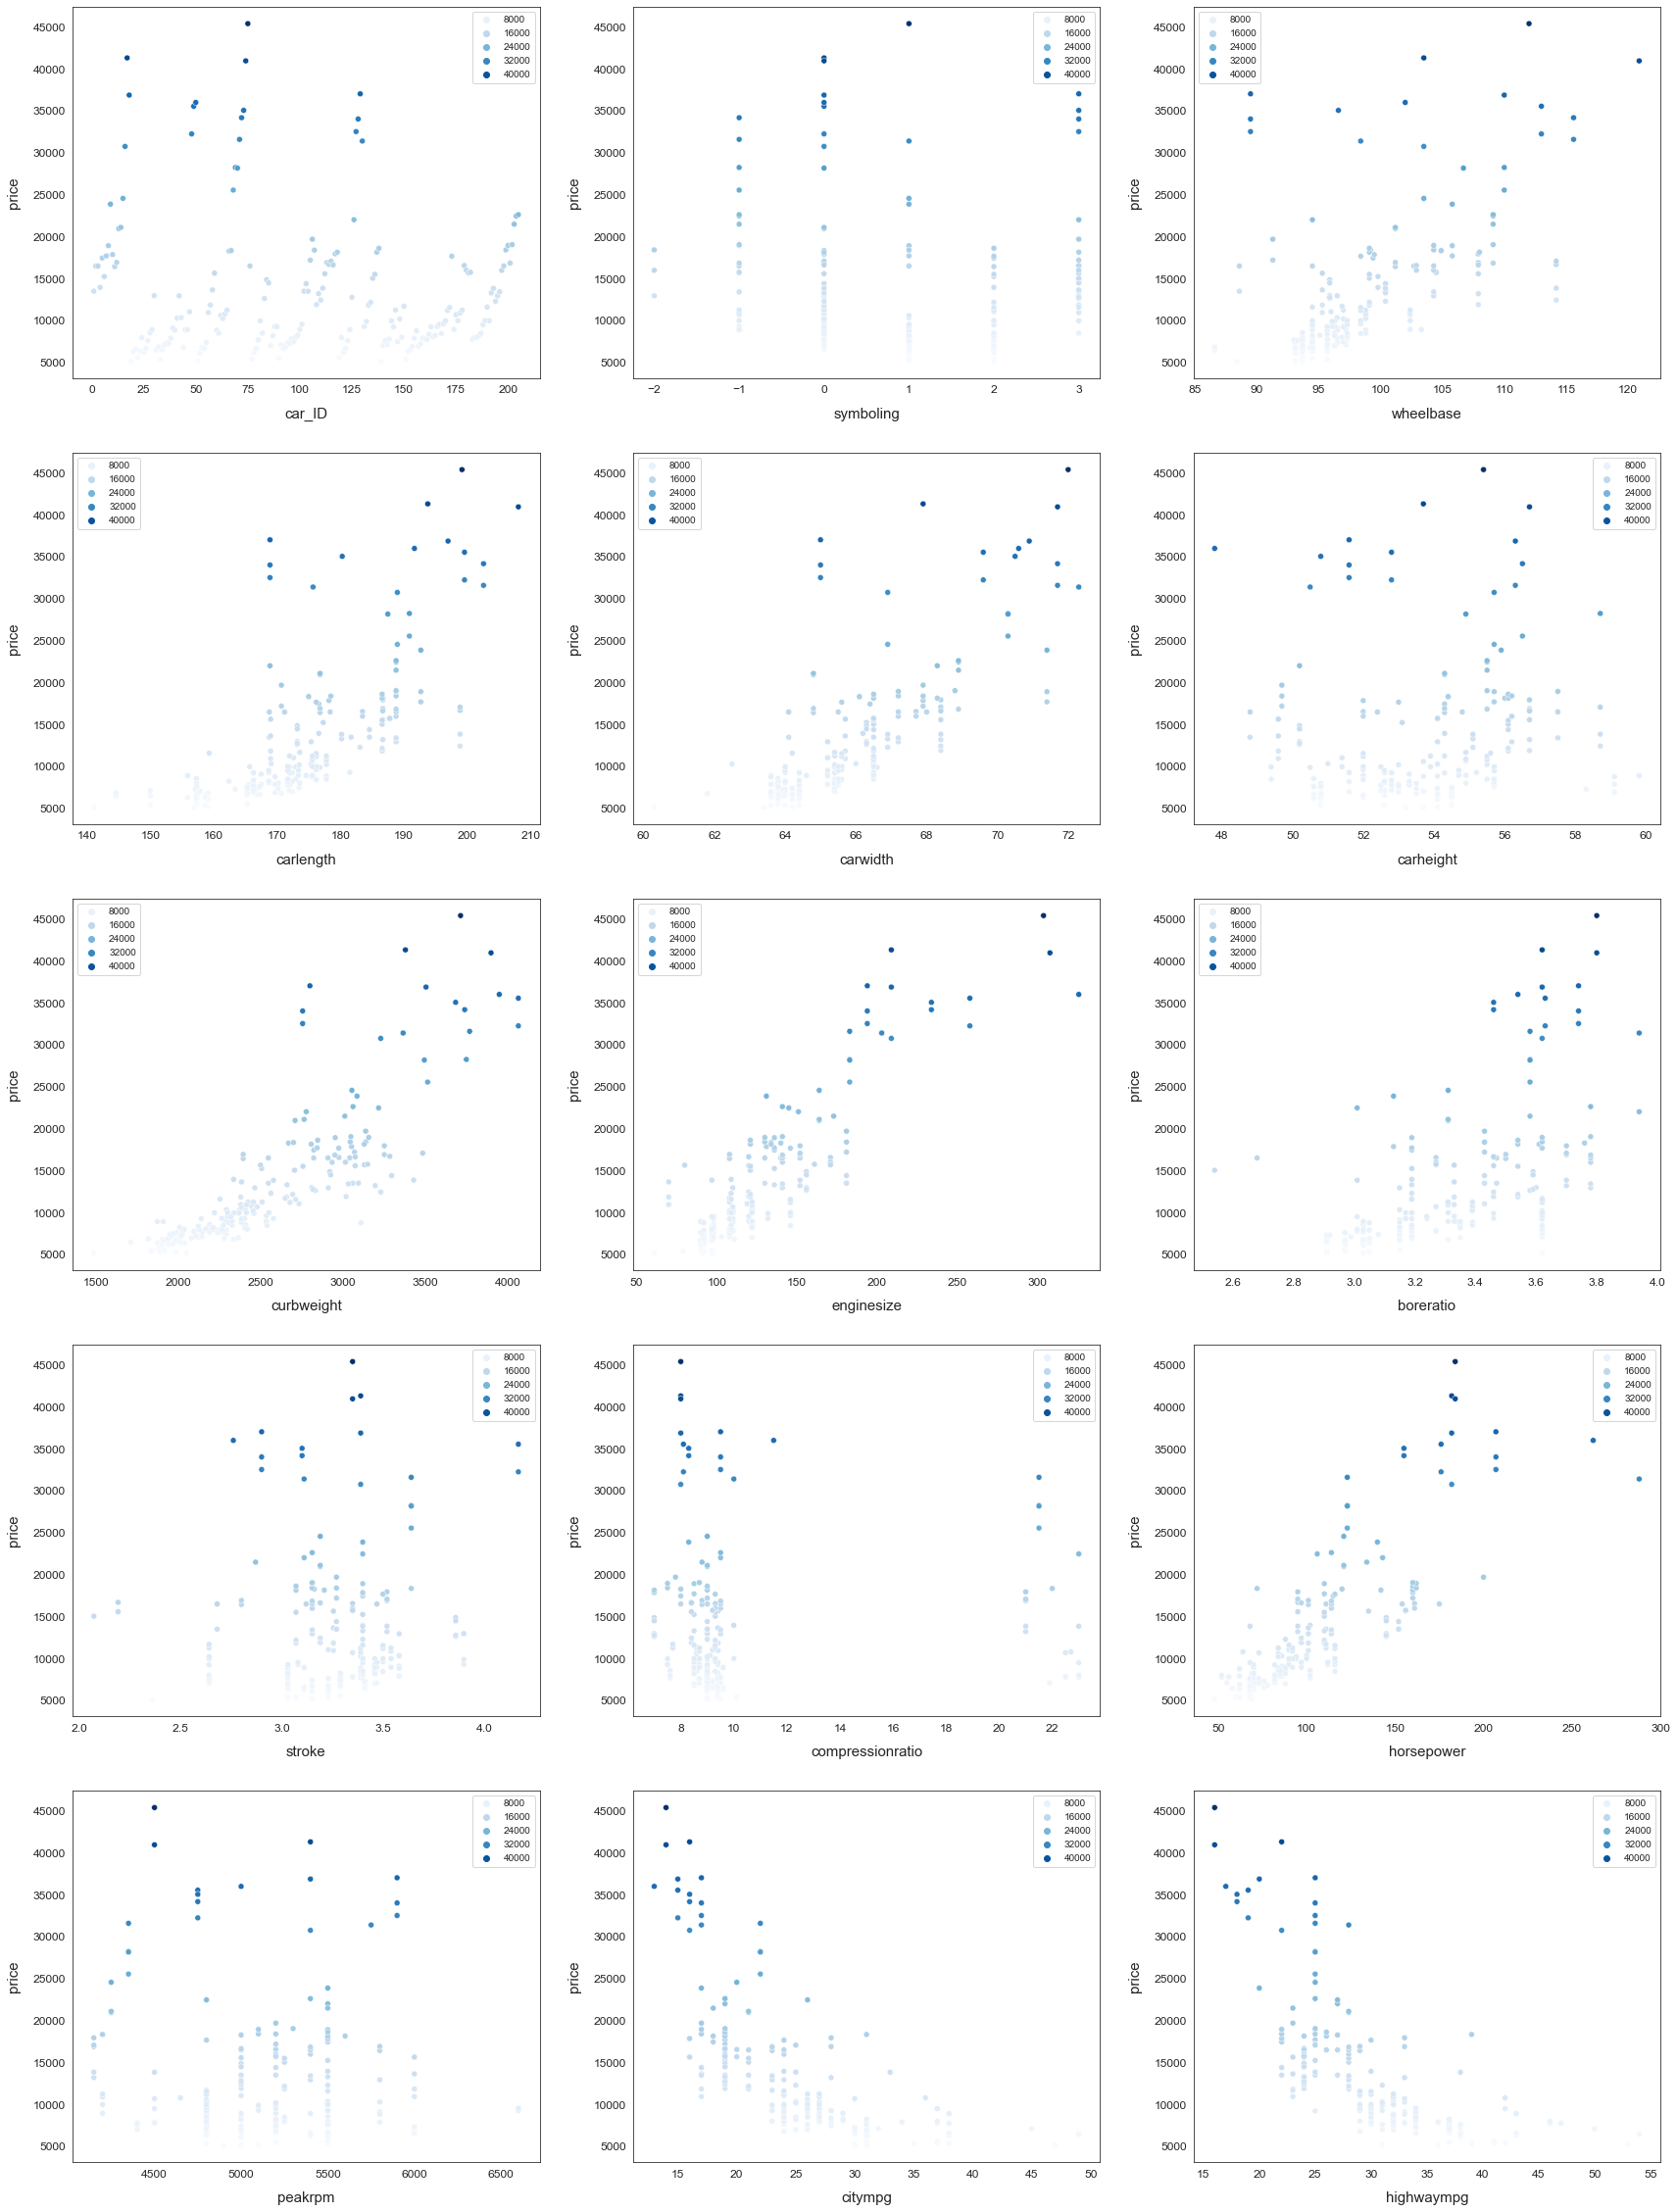

In [134]:
# Finding numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []

features = df_data.drop(['price'], axis=1, inplace=False)
label = df_data['price']

for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        if i in ['TotalSF', 'Total_Bathrooms','Total_porch_sf','haspool','hasgarage','hasbsmt','hasfireplace']:
            pass
        else:
            numeric.append(i)

# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 50))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(features[numeric]), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y=label, hue=label, palette='Blues', data=features)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('price', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

In [135]:
df_data.columns

Index([...
       'car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Company'],
      dtype='object', length=27)

In [136]:
df_data.drop(['car_ID', 'CarName', 'symboling', 'carheight', 'compressionratio', 'stroke', 'peakrpm'], axis=1, inplace=True)

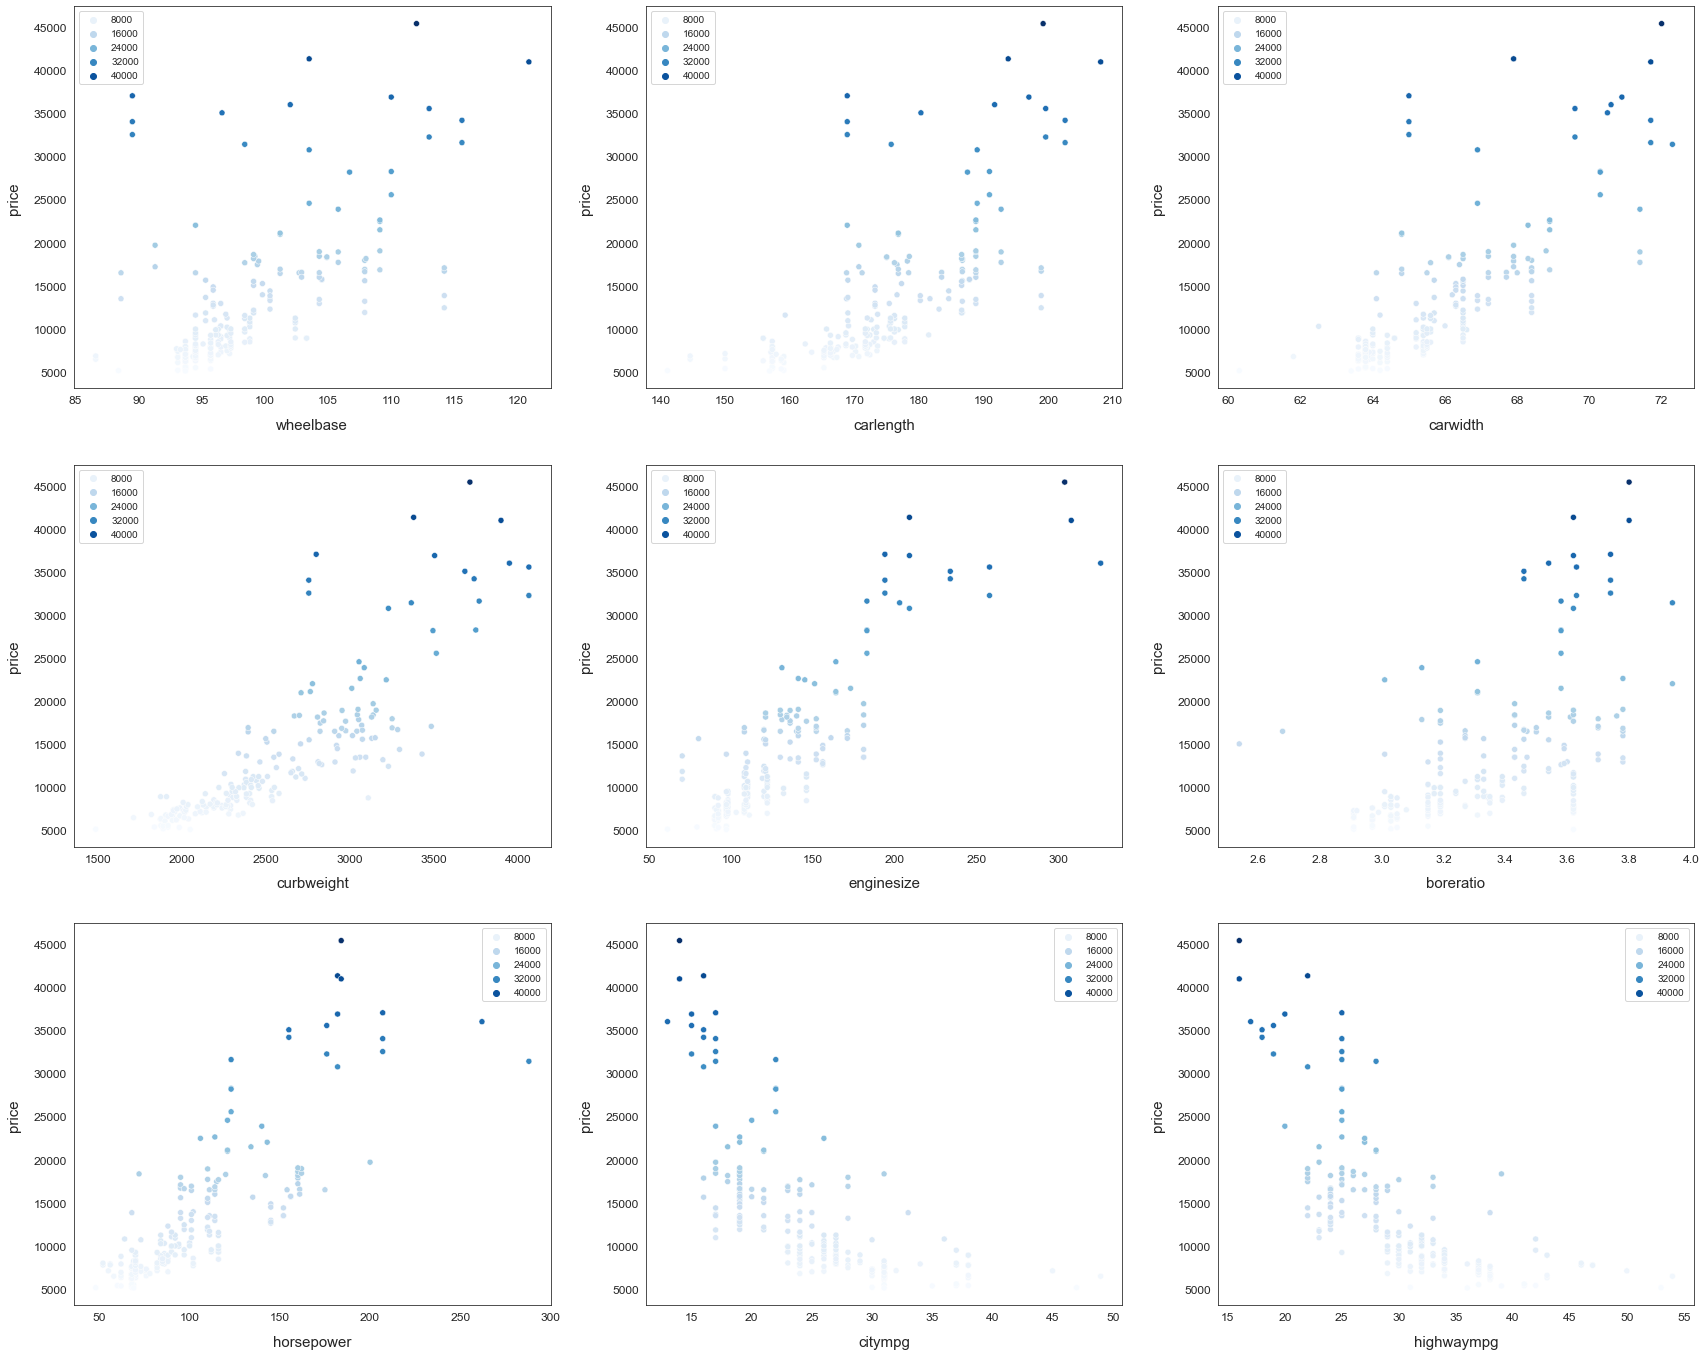

In [137]:
# Finding numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []

features = df_data.drop(['price'], axis=1, inplace=False)
label = df_data['price']

for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        if i in ['TotalSF', 'Total_Bathrooms','Total_porch_sf','haspool','hasgarage','hasbsmt','hasfireplace']:
            pass
        else:
            numeric.append(i)

# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 30))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(features[numeric]), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y=label, hue=label, palette='Blues', data=features)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('price', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

<AxesSubplot:>

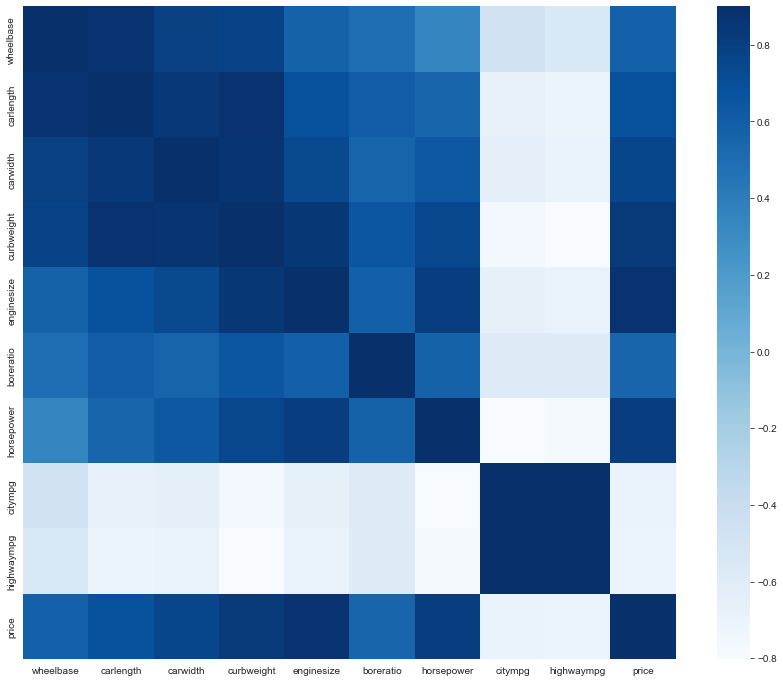

In [138]:
# cacluate a correlation of the features
corr = df_data.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [139]:
df_data.drop(['citympg'], axis=1, inplace=True)

<AxesSubplot:>

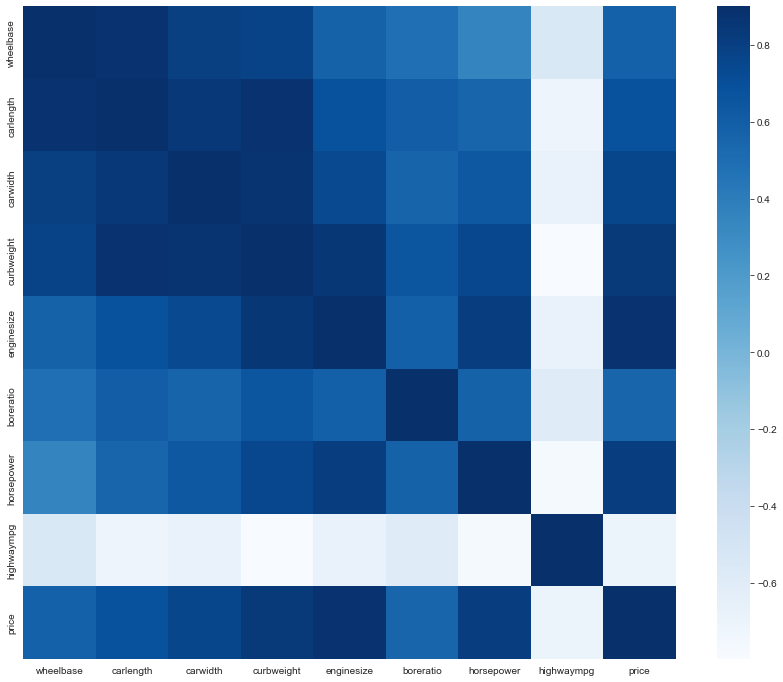

In [140]:
# cacluate a correlation of the features
corr = df_data.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [141]:
numerical_feats = df_data.dtypes[df_data.dtypes != "object"].index 
print("Number of Numerical features: ", len(numerical_feats)) 
print("*"*80)
categorical_feats = df_data.dtypes[df_data.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))
print("*"*80)
# Check categorical feature

print('numerical_feats : ',df_data[numerical_feats].columns)
print("*"*80)
print('categorical_feats : ',df_data[categorical_feats].columns)

Number of Numerical features:  9
********************************************************************************
Number of Categorical features:  10
********************************************************************************
numerical_feats :  Index([...
       'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'highwaympg', 'price'],
      dtype='object', length=9)
********************************************************************************
categorical_feats :  Index([...
       'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'Company'],
      dtype='object', length=10)


In [142]:
# Check VIF

VIF_features = df_data[numerical_feats]

# 결과값을 저장할 VIF 리스트 생성
VIF = []

# values 속성을 이용해서 train 데이터의 값만 추출
VIF_val = VIF_features.values

# variance_inflation_factor 함수에 인자로 train_val과 인덱스 번호 지정
for i in range(len(VIF_features.columns)):
	VIF.append(variance_inflation_factor(VIF_val, i))

# DataFrame 형식으로 바꿔서 가독성 높이기
vif_dataframe = pd.DataFrame()
vif_dataframe['columns'] = VIF_features.columns
vif_dataframe['VIF'] = VIF
vif_dataframe

,columns,VIF
0,wheelbase,1655.130434


In [143]:
VIF_features = df_data[numerical_feats]
# MinMaxScaler를 통해 변수 변환
scaler = MinMaxScaler()
scaler.fit(VIF_features)
train_scale = scaler.transform(VIF_features)

# MinMaxSclaer를 통해 변환된 train 데이터의 VIF 확인

new_data_df = pd.DataFrame(train_scale)
new_data_df.columns = df_data[numerical_feats].columns

VIF = pd.DataFrame()
VIF['VIF Factor'] = [variance_inflation_factor(new_data_df.values, i) for i in range(new_data_df.shape[1])]
VIF['features'] = new_data_df.columns
VIF

,VIF Factor,features
0,30.785883,wheelbase


In [144]:
# carlength feature remove
df_data.drop(['carlength'], axis=1, inplace=True)

numerical_feats = df_data.dtypes[df_data.dtypes != "object"].index 
print("Number of Numerical features: ", len(numerical_feats)) 
print("*"*80)
categorical_feats = df_data.dtypes[df_data.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))

# Check categorical feature

print('numerical_feats : ',df_data[numerical_feats].columns)
print("*"*80)
print('categorical_feats : ',df_data[categorical_feats].columns)

Number of Numerical features:  8
********************************************************************************
Number of Categorical features:  10
numerical_feats :  Index([...
       'wheelbase', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'highwaympg', 'price'],
      dtype='object', length=8)
********************************************************************************
categorical_feats :  Index([...
       'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'Company'],
      dtype='object', length=10)


In [145]:
VIF_features = df_data[numerical_feats]
# MinMaxScaler를 통해 변수 변환
scaler = MinMaxScaler()
scaler.fit(VIF_features)
train_scale = scaler.transform(VIF_features)

# MinMaxSclaer를 통해 변환된 train 데이터의 VIF 확인

new_data_df = pd.DataFrame(train_scale)
new_data_df.columns = df_data[numerical_feats].columns

VIF = pd.DataFrame()
VIF['VIF Factor'] = [variance_inflation_factor(new_data_df.values, i) for i in range(new_data_df.shape[1])]
VIF['features'] = new_data_df.columns
VIF

,VIF Factor,features
0,23.302537,wheelbase


In [146]:
# curbweight feature remove
df_data.drop(['curbweight'], axis=1, inplace=True)

numerical_feats = df_data.dtypes[df_data.dtypes != "object"].index 
print("Number of Numerical features: ", len(numerical_feats)) 
print("*"*80)
categorical_feats = df_data.dtypes[df_data.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))

# Check categorical feature

print('numerical_feats : ',df_data[numerical_feats].columns)
print("*"*80)
print('categorical_feats : ',df_data[categorical_feats].columns)

Number of Numerical features:  7
********************************************************************************
Number of Categorical features:  10
numerical_feats :  Index([...
       'wheelbase', 'carwidth', 'enginesize', 'boreratio', 'horsepower',
       'highwaympg', 'price'],
      dtype='object', length=7)
********************************************************************************
categorical_feats :  Index([...
       'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'Company'],
      dtype='object', length=10)


In [147]:
VIF_features = df_data[numerical_feats]
# MinMaxScaler를 통해 변수 변환
scaler = MinMaxScaler()
scaler.fit(VIF_features)
train_scale = scaler.transform(VIF_features)

# MinMaxSclaer를 통해 변환된 train 데이터의 VIF 확인

new_data_df = pd.DataFrame(train_scale)
new_data_df.columns = df_data[numerical_feats].columns

VIF = pd.DataFrame()
VIF['VIF Factor'] = [variance_inflation_factor(new_data_df.values, i) for i in range(new_data_df.shape[1])]
VIF['features'] = new_data_df.columns
VIF

,VIF Factor,features
0,18.314322,wheelbase


In [148]:
# carwidth feature remove
df_data.drop(['carwidth'], axis=1, inplace=True)

numerical_feats = df_data.dtypes[df_data.dtypes != "object"].index 
print("Number of Numerical features: ", len(numerical_feats)) 
print("*"*80)
categorical_feats = df_data.dtypes[df_data.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))

# Check categorical feature

print('numerical_feats : ',df_data[numerical_feats].columns)
print("*"*80)
print('categorical_feats : ',df_data[categorical_feats].columns)

Number of Numerical features:  6
********************************************************************************
Number of Categorical features:  10
numerical_feats :  Index([...
       'wheelbase', 'enginesize', 'boreratio', 'horsepower', 'highwaympg',
       'price'],
      dtype='object', length=6)
********************************************************************************
categorical_feats :  Index([...
       'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'Company'],
      dtype='object', length=10)


In [149]:
VIF_features = df_data[numerical_feats]
# MinMaxScaler를 통해 변수 변환
scaler = MinMaxScaler()
scaler.fit(VIF_features)
train_scale = scaler.transform(VIF_features)

# MinMaxSclaer를 통해 변환된 train 데이터의 VIF 확인

new_data_df = pd.DataFrame(train_scale)
new_data_df.columns = df_data[numerical_feats].columns

VIF = pd.DataFrame()
VIF['VIF Factor'] = [variance_inflation_factor(new_data_df.values, i) for i in range(new_data_df.shape[1])]
VIF['features'] = new_data_df.columns
VIF

,VIF Factor,features
0,8.710766,wheelbase


In [150]:
# enginesize feature remove
df_data.drop(['enginesize'], axis=1, inplace=True)

numerical_feats = df_data.dtypes[df_data.dtypes != "object"].index 
print("Number of Numerical features: ", len(numerical_feats)) 
print("*"*80)
categorical_feats = df_data.dtypes[df_data.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))

# Check categorical feature

print('numerical_feats : ',df_data[numerical_feats].columns)
print("*"*80)
print('categorical_feats : ',df_data[categorical_feats].columns)

Number of Numerical features:  5
********************************************************************************
Number of Categorical features:  10
numerical_feats :  Index([...
       'wheelbase', 'boreratio', 'horsepower', 'highwaympg', 'price'],
      dtype='object', length=5)
********************************************************************************
categorical_feats :  Index([...
       'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'Company'],
      dtype='object', length=10)


In [151]:
VIF_features = df_data[numerical_feats]
# MinMaxScaler를 통해 변수 변환
scaler = MinMaxScaler()
scaler.fit(VIF_features)
train_scale = scaler.transform(VIF_features)

# MinMaxSclaer를 통해 변환된 train 데이터의 VIF 확인

new_data_df = pd.DataFrame(train_scale)
new_data_df.columns = df_data[numerical_feats].columns

VIF = pd.DataFrame()
VIF['VIF Factor'] = [variance_inflation_factor(new_data_df.values, i) for i in range(new_data_df.shape[1])]
VIF['features'] = new_data_df.columns
VIF

,VIF Factor,features
0,8.093913,wheelbase


## Categorical feature preprocessing

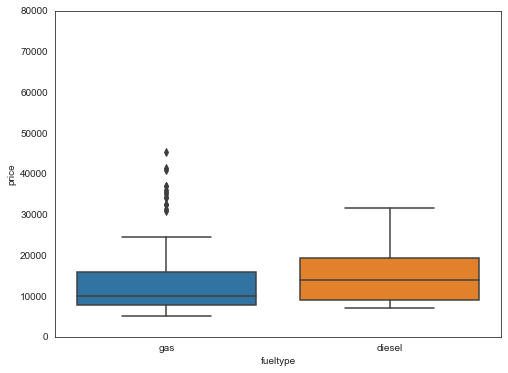

In [152]:
# SalePrice with a fueltype feature
data = pd.concat([df_data['price'], df_data['fueltype']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df_data['fueltype'], y="price", data=data)
fig.axis(ymin=0, ymax=80000);

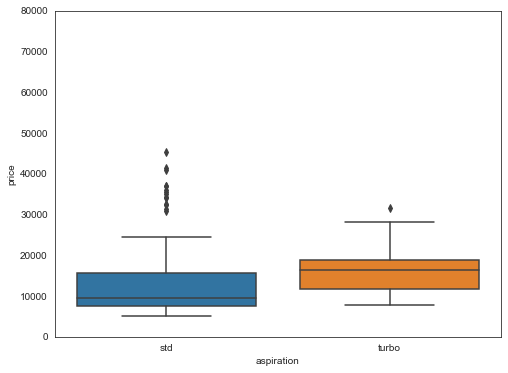

In [153]:
# SalePrice with a aspiration feature
data = pd.concat([df_data['price'], df_data['aspiration']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df_data['aspiration'], y="price", data=data)
fig.axis(ymin=0, ymax=80000);

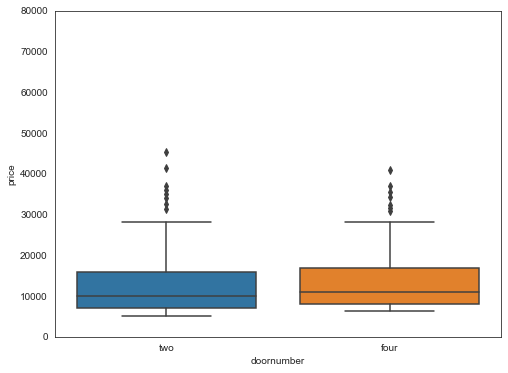

In [154]:
# SalePrice with a doornumber feature
data = pd.concat([df_data['price'], df_data['doornumber']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df_data['doornumber'], y="price", data=data)
fig.axis(ymin=0, ymax=80000);

#### doornumber feature drop

In [155]:
df_data.drop(['doornumber'], axis=1, inplace=True)

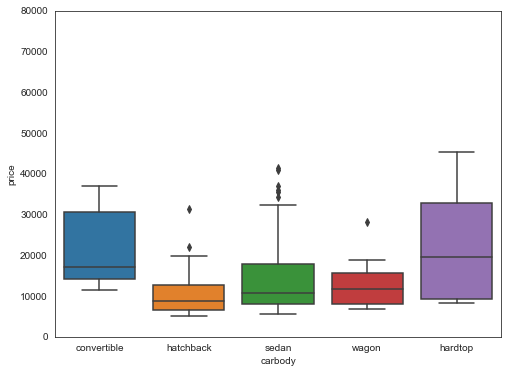

In [156]:
# SalePrice with a carbody feature
data = pd.concat([df_data['price'], df_data['carbody']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df_data['carbody'], y="price", data=data)
fig.axis(ymin=0, ymax=80000);

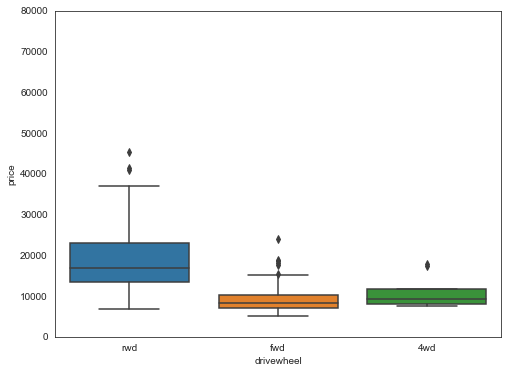

In [157]:
# SalePrice with a drivewheel feature
data = pd.concat([df_data['price'], df_data['drivewheel']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df_data['drivewheel'], y="price", data=data)
fig.axis(ymin=0, ymax=80000);

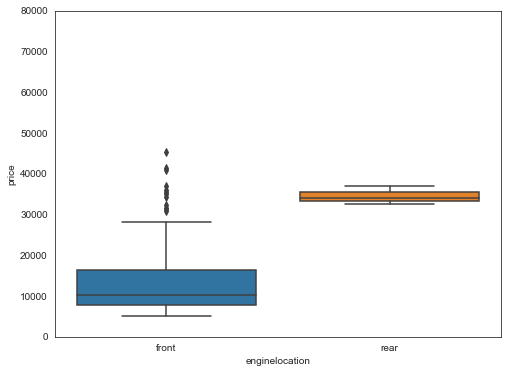

In [158]:
# SalePrice with a enginelocation feature
data = pd.concat([df_data['price'], df_data['enginelocation']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df_data['enginelocation'], y="price", data=data)
fig.axis(ymin=0, ymax=80000);

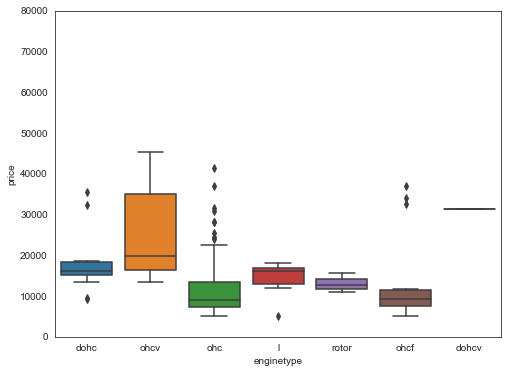

In [159]:
# SalePrice with a enginetype feature
data = pd.concat([df_data['price'], df_data['enginetype']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df_data['enginetype'], y="price", data=data)
fig.axis(ymin=0, ymax=80000);

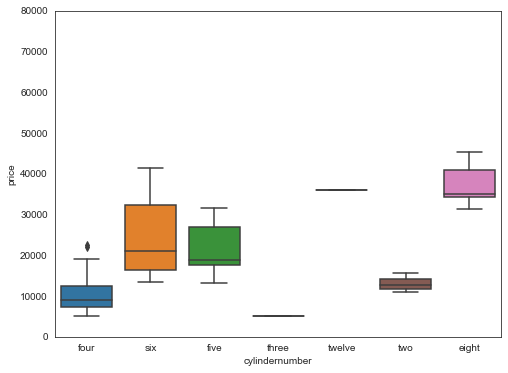

In [160]:
# SalePrice with a cylindernumber feature
data = pd.concat([df_data['price'], df_data['cylindernumber']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df_data['cylindernumber'], y="price", data=data)
fig.axis(ymin=0, ymax=80000);

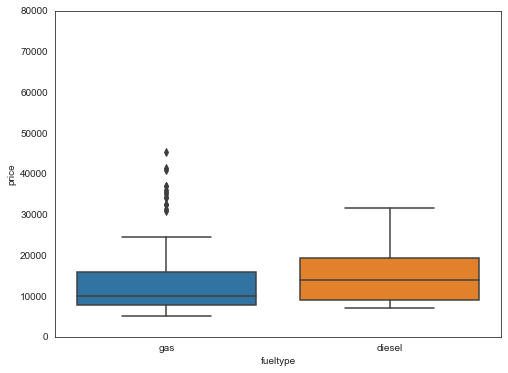

In [161]:
# SalePrice with a fueltype feature
data = pd.concat([df_data['price'], df_data['fueltype']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df_data['fueltype'], y="price", data=data)
fig.axis(ymin=0, ymax=80000);

fueltype feature drop

In [162]:
df_data.drop(['fueltype'], axis=1, inplace=True)

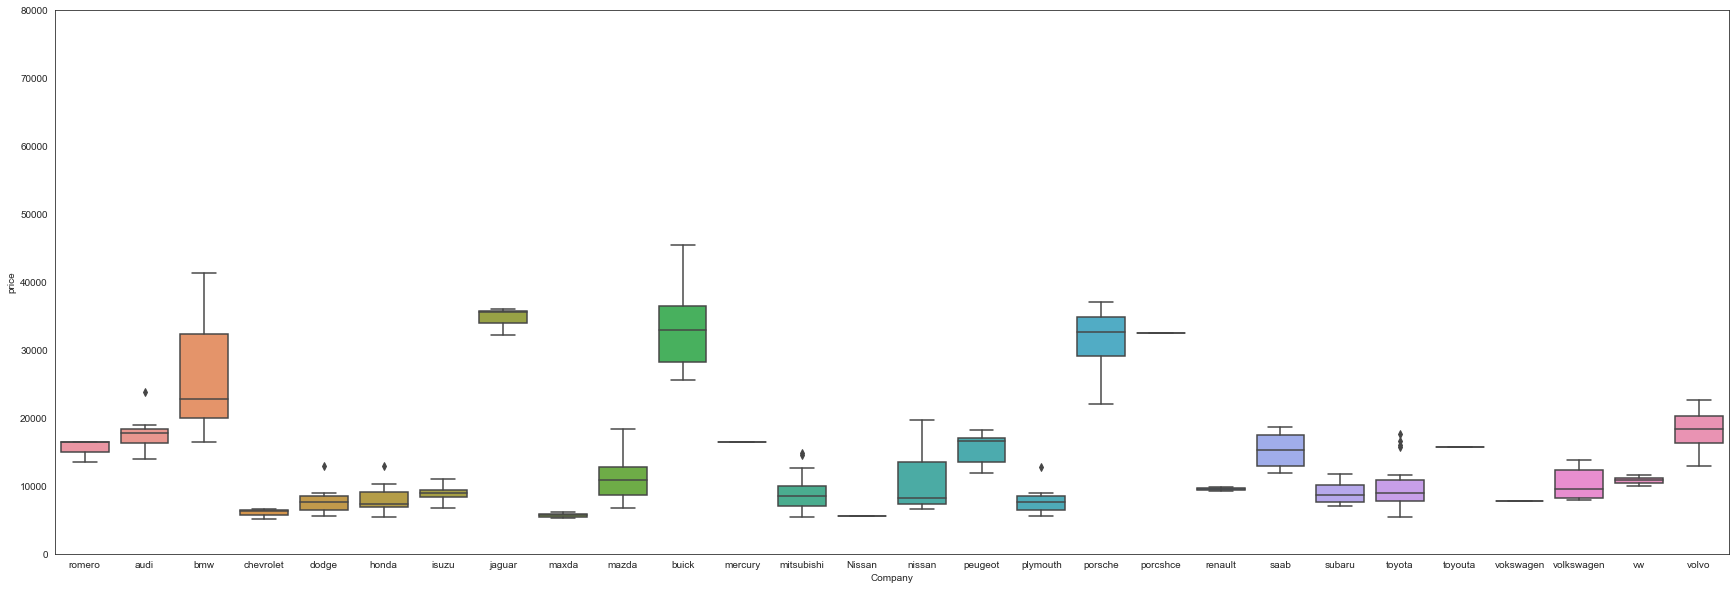

In [163]:
# SalePrice with a Company feature
data = pd.concat([df_data['price'], df_data['Company']], axis=1)
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x=df_data['Company'], y="price", data=data)
fig.axis(ymin=0, ymax=80000);

In [164]:
numerical_feats = df_data.dtypes[df_data.dtypes != "object"].index 
print("Number of Numerical features: ", len(numerical_feats)) 
categorical_feats = df_data.dtypes[df_data.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))

# Check categorical feature

print('numerical_feats : ',df_data[numerical_feats].columns)
print("*"*80)
print('categorical_feats : ',df_data[categorical_feats].columns)

Number of Numerical features:  5
Number of Categorical features:  8
numerical_feats :  Index([...
       'wheelbase', 'boreratio', 'horsepower', 'highwaympg', 'price'],
      dtype='object', length=5)
********************************************************************************
categorical_feats :  Index([...
       'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'Company'],
      dtype='object', length=8)


In [165]:
# Transform 'price' feature to log

df_data["price_Log"] = df_data["price"].map(lambda i:np.log(i) if i>0 else 0)
df_data.drop(['price'], axis=1, inplace=True)

## Case 1. With Company feature

In [106]:
new_data = pd.get_dummies(df_data, columns = ['aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 
                                              'fuelsystem', 'Company'])

In [107]:
new_data.columns

Index([...
       'wheelbase', 'boreratio', 'horsepower', 'highwaympg', 'price_Log',
       'aspiration_std', 'aspiration_turbo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Company_Nissan', 'Company_audi',
       'Company_bmw', 'Company_buick', 'Company_chevrolet', 'Company_dodge',
       'Company_honda', 'Company_isuzu', 'Compa

In [108]:
# with log scale 'price_Log' feature
train_label = new_data['price_Log']
train_data = new_data.drop(['price_Log'], axis=1)

# # with 'price' feature
# train_label = new_data['price']
# train_data = new_data.drop(['price'], axis=1)

In [109]:
# Setup cross validation folds
KF = KFold(n_splits=12, random_state=2020, shuffle=True)

In [110]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=train_data):
    rmse = np.sqrt(-cross_val_score(model, X, train_label, scoring="neg_mean_squared_error", cv=KF))
    return (rmse)

In [111]:
# Setup models
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=KF))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [112]:
# Train models
scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] featu

In [113]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

xgboost: 0.1888 (0.0303)


In [114]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 0.1721 (0.0258)


In [115]:
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

ridge: 0.1562 (0.0156)


In [116]:
score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

rf: 0.1732 (0.0326)


In [117]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

gbr: 0.1424 (0.0260)


In [118]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(train_data, train_label)

lightgbm
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


In [119]:
print('xgboost')
xgb_model_full_data = xgboost.fit(train_data, train_label)

xgboost


In [120]:
print('Svr')
svr_model_full_data = svr.fit(train_data, train_label)

Svr


In [121]:
print('Ridge')
ridge_model_full_data = ridge.fit(train_data, train_label)

Ridge


In [122]:
print('RandomForest')
rf_model_full_data = rf.fit(train_data, train_label)

RandomForest


In [123]:
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(train_data), np.array(train_label))

stack_gen
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warn

In [124]:
# Blend models with weights in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.2 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.45 * stack_gen_model.predict(np.array(X))))

In [125]:
# Get final precitions from the blended model
blended_score = rmsle(train_label, blended_predictions(train_data))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.12086221787896428


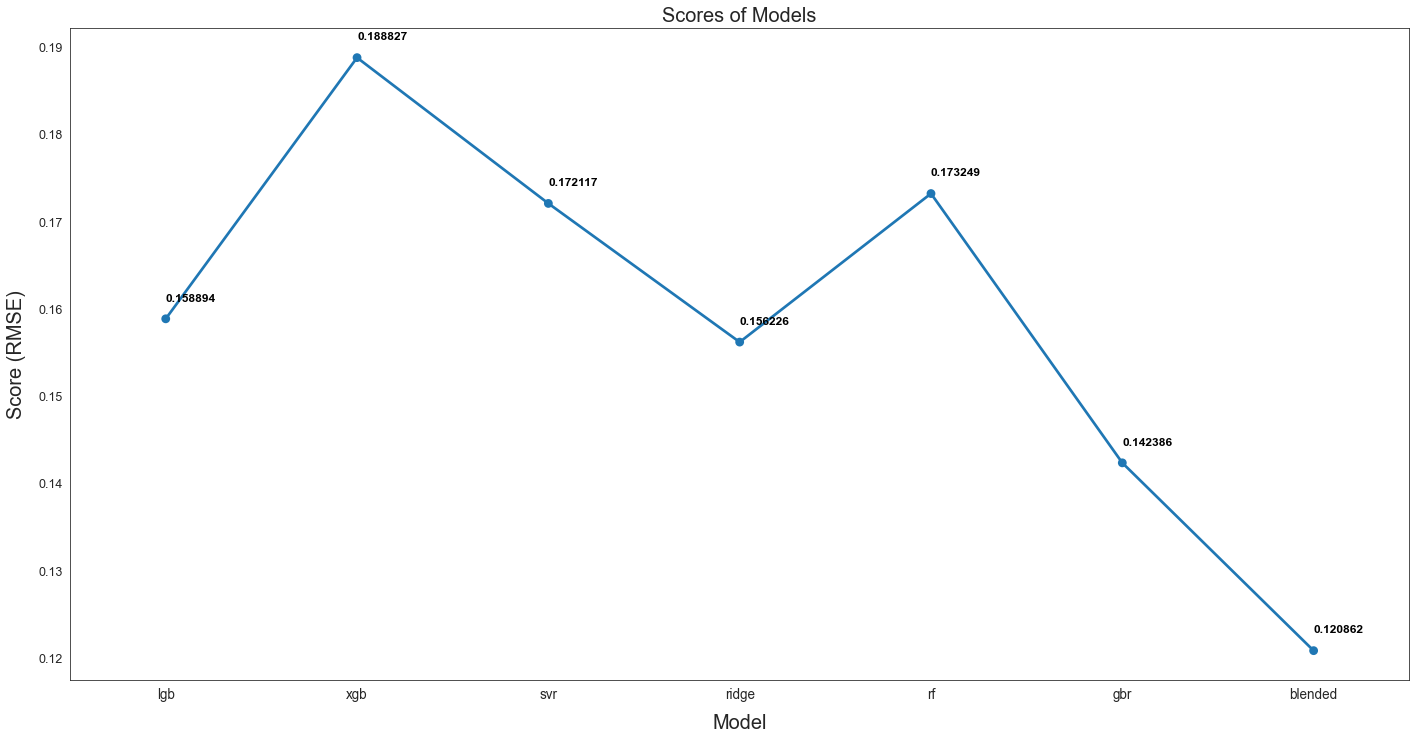

In [126]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

## Case 2. Without Company feature

In [166]:
df_data.drop(['Company'], axis=1, inplace=True)

new_data = pd.get_dummies(df_data, columns = ['aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 
                                              'fuelsystem'])

In [167]:
# with log scale 'price_Log' feature
train_label = new_data['price_Log']
train_data = new_data.drop(['price_Log'], axis=1)

# # with 'price' feature
# train_label = new_data['price']
# train_data = new_data.drop(['price'], axis=1)

In [168]:
# Setup cross validation folds
KF = KFold(n_splits=12, random_state=2020, shuffle=True)

In [169]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=train_data):
    rmse = np.sqrt(-cross_val_score(model, X, train_label, scoring="neg_mean_squared_error", cv=KF))
    return (rmse)

In [170]:
# Setup models
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=KF))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [174]:
# Train models
scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] featu

In [175]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

xgboost: 0.1890 (0.0303)


In [176]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 0.1823 (0.0289)


In [177]:
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

ridge: 0.1718 (0.0210)


In [178]:
score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

rf: 0.1745 (0.0337)


In [179]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

gbr: 0.1440 (0.0253)


In [180]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(train_data, train_label)

lightgbm
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


In [181]:
print('xgboost')
xgb_model_full_data = xgboost.fit(train_data, train_label)

xgboost


In [182]:
print('Svr')
svr_model_full_data = svr.fit(train_data, train_label)

Svr


In [183]:
print('Ridge')
ridge_model_full_data = ridge.fit(train_data, train_label)

Ridge


In [184]:
print('RandomForest')
rf_model_full_data = rf.fit(train_data, train_label)

RandomForest


In [185]:
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(train_data), np.array(train_label))

stack_gen
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warn

In [186]:
# Blend models with weights in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.2 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.45 * stack_gen_model.predict(np.array(X))))

In [187]:
# Get final precitions from the blended model
blended_score = rmsle(train_label, blended_predictions(train_data))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.12842068670046272


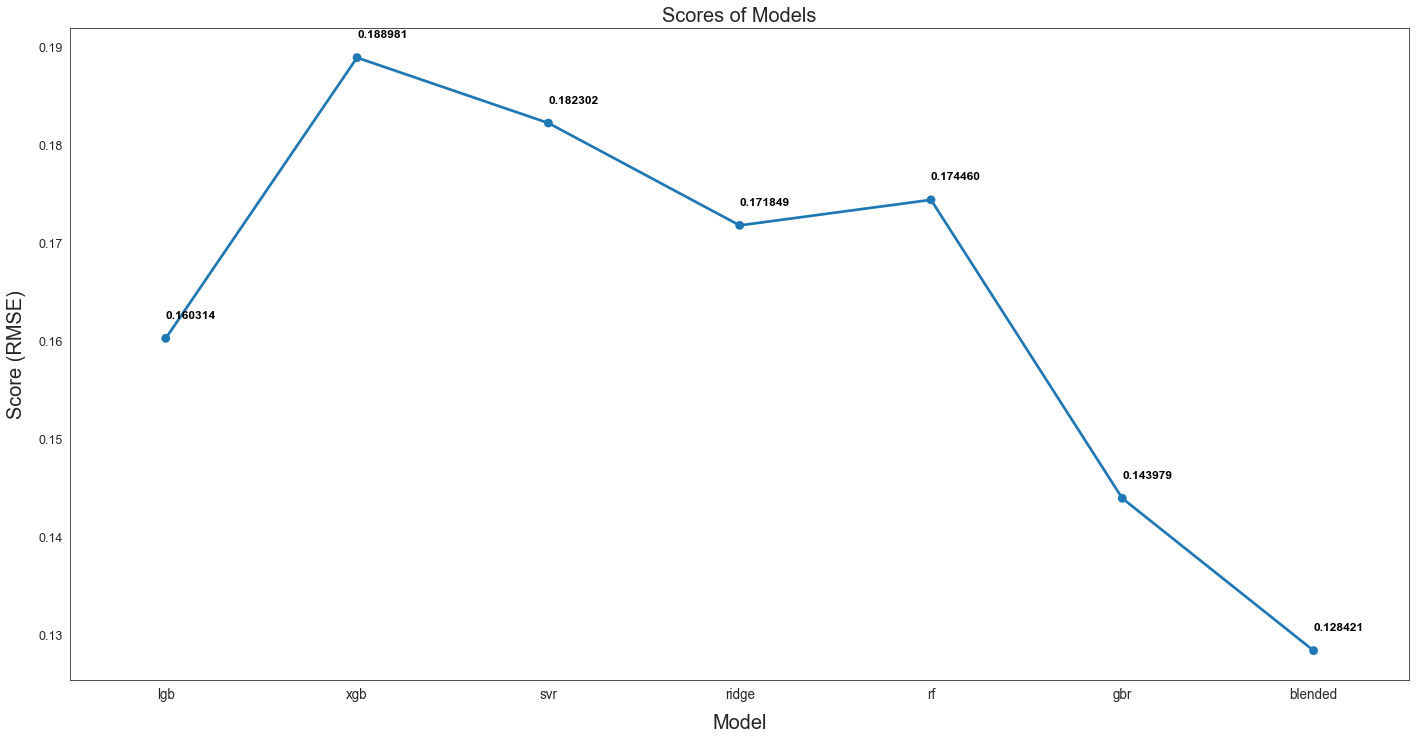

In [188]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()